In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
dataset = keras.datasets.mnist

In [3]:
(X_trainfull, Y_trainfull), (X_testfull, Y_testfull) = dataset.load_data()

In [4]:
print(X_trainfull.shape[0],'X train samples')
print(X_testfull.shape[0],'X test samples')
print(Y_trainfull.shape[0], 'Y train samples')
print(Y_testfull.shape[0],'Y test samples')

60000 X train samples
10000 X test samples
60000 Y train samples
10000 Y test samples


In [5]:
pd.Series(Y_trainfull).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [6]:
pd.Series(Y_testfull).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

In [7]:
X_train = X_trainfull[:6000]
Y_train = Y_trainfull[:6000]
X_test = X_testfull[:1000]
Y_test = Y_testfull[:1000]

In [8]:
#  Dimensionality Reduction
nsample, nx, ny = X_test.shape
X_test = X_test.reshape(nsample,nx*ny)
nsample, nx, ny = X_train.shape
X_train = X_train.reshape(nsample,nx*ny)

# Feature Scaling
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [16]:
model = LogisticRegression(random_state = 0)
model.fit(X_train, Y_train)

/home/tintin/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

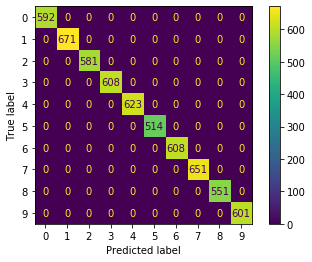

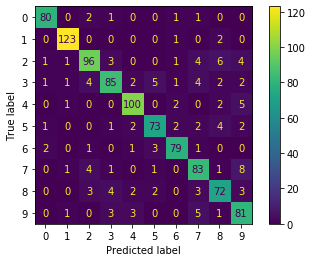

In [23]:
# Making the Confusion Matrix
plot_confusion_matrix(model, X_train, Y_train)
plot_confusion_matrix(model, X_test, Y_test)


In [21]:
# Evaluate model
accuracy_score = model.score(X_test, Y_test)
print("Accuracy of train model: ", model.score(X_train,Y_train))
print("Accuracy of test model: ",accuracy_score)


Accuracy of train model:  1.0
Accuracy of test model:  0.872
